# SALES_DATA
*Đây là bộ dữ liệu được thu thập từ 1/1/2023 đến 22/9/2023 trong quá trình nhập và bán hàng của một doanh nghiệp vừa và nhỏ chuyên nhận order hộ các mặt hàng thời trang ở nước ngoài.*
***Do tính chất của doanh nghiệp không chú trọng vào data, nên bộ dữ liệu doanh thu không được đầy đủ, và có khả năng sai sót.***

Raw_Codebook: https://docs.google.com/spreadsheets/d/1AQ9f11yc4vM0Co4i-vSSCC6t3ao0z4Z6Jo57JH6OTWw/edit?usp=sharing

*Nhóm đã tiến hành làm sạch sơ bộ trực tiếp trên excel, song vẫn còn nhiều không gian cần được chỉnh sửa và làm sạch*

1. date: Ngày khách hàng yêu cầu đơn đặt hàng
2. name_web: Tên trang web nước ngoài đặt hàng
3. link_product: Link sản phẩm
4. subject: sản phẩm dành cho W (woman: nữ), M (Man: nam), U (Unisex: cả hai)
5. category: danh mục của sản phẩm
6. color: màu của sản phẩm
7. amount: số lượng sản phẩm
8. purchase_price: Giá mua vào
9. sale_price: Giá bán ra


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [257]:
data_path = 'SALESDATA.csv'

In [258]:
sale_data = pd.read_csv(data_path)
sale_data.head()

,date,name_web,link_product,subject,color,category,amount,purchase_price,sale_price
0,1/14/2023,amazon,https://www.amazon.com/Karl-Lagerfeld-Paris-Ma...,U,black,Bag,1.0,"1,560,900.00 đ","1,890,000.00 đ"
1,1/14/2023,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,scarlet,Dress,2.0,"744,120.00 đ","890,000.00 đ"
2,1/14/2023,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,scarlet,Dress,2.0,"744,120.00 đ","890,000.00 đ"
3,1/14/2023,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,sky captain,Dress,6.0,"744,120.00 đ","890,000.00 đ"
4,1/14/2023,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,sky captain,Dress,2.0,"744,120.00 đ","890,000.00 đ"


In [259]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1788 entries, 0 to 1787
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1788 non-null   object 
 1   name_web        1788 non-null   object 
 2   link_product    1786 non-null   object 
 3   subject         1788 non-null   object 
 4   color           1781 non-null   object 
 5   category        1785 non-null   object 
 6   amount          1769 non-null   float64
 7   purchase_price  1765 non-null   object 
 8   sale_price      1625 non-null   object 
dtypes: float64(1), object(8)
memory usage: 125.8+ KB


## Date
Chuyển cột date về kiểu dữ liệu datetime

In [260]:
sale_data['date'] = pd.to_datetime(sale_data['date'])
sale_data.head()

,date,name_web,link_product,subject,color,category,amount,purchase_price,sale_price
0,2023-01-14,amazon,https://www.amazon.com/Karl-Lagerfeld-Paris-Ma...,U,black,Bag,1.0,"1,560,900.00 đ","1,890,000.00 đ"
1,2023-01-14,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,scarlet,Dress,2.0,"744,120.00 đ","890,000.00 đ"
2,2023-01-14,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,scarlet,Dress,2.0,"744,120.00 đ","890,000.00 đ"
3,2023-01-14,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,sky captain,Dress,6.0,"744,120.00 đ","890,000.00 đ"
4,2023-01-14,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,sky captain,Dress,2.0,"744,120.00 đ","890,000.00 đ"


In [261]:
sale_data['year'] = sale_data['date'].dt.year
sale_data['month'] = sale_data['date'].dt.month
sale_data['day'] = sale_data['date'].dt.day

sale_data.head()

,date,name_web,link_product,subject,color,category,amount,purchase_price,sale_price,year,month,day
0,2023-01-14,amazon,https://www.amazon.com/Karl-Lagerfeld-Paris-Ma...,U,black,Bag,1.0,"1,560,900.00 đ","1,890,000.00 đ",2023,1,14
1,2023-01-14,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,scarlet,Dress,2.0,"744,120.00 đ","890,000.00 đ",2023,1,14
2,2023-01-14,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,scarlet,Dress,2.0,"744,120.00 đ","890,000.00 đ",2023,1,14
3,2023-01-14,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,sky captain,Dress,6.0,"744,120.00 đ","890,000.00 đ",2023,1,14
4,2023-01-14,macys,https://www.macys.com/shop/product/tommy-hilfi...,W,sky captain,Dress,2.0,"744,120.00 đ","890,000.00 đ",2023,1,14


## name_web

Sau khi quan sát dữ liệu, nhóm nhận thấy có khá nhiều cột bị điền sai, cần được chỉnh sửa

In [262]:
sale_data['name_web'].unique()

array(['amazon', 'macys', 'saksoff5th', 'nordstromrack', 'jomashop',
       'nordstrom', 'adidas', 'karllagerfeldparis', 'ssense', 'walmart',
       'ashford', 'tommy anni', 'Estee', 'Son MAC', 'Gucci', 'Giày tommy',
       'madaluxetime', 'movadocompanystore', 'puma', 'fossil',
       'guessfactory', 'lacoste', 'coachoutlet', 'michaelkors',
       'watchstation', 'zulily'], dtype=object)

In [263]:
sale_data['name_web'].replace(to_replace=['Giày tommy', 'tommy anni'],
                              value = 'tommy',
                              inplace= True)

sale_data['name_web'].replace(to_replace = ['Son MAC'],
                              value = 'MAC',
                              inplace = True)
sale_data['name_web'].unique()

array(['amazon', 'macys', 'saksoff5th', 'nordstromrack', 'jomashop',
       'nordstrom', 'adidas', 'karllagerfeldparis', 'ssense', 'walmart',
       'ashford', 'tommy', 'Estee', 'MAC', 'Gucci', 'madaluxetime',
       'movadocompanystore', 'puma', 'fossil', 'guessfactory', 'lacoste',
       'coachoutlet', 'michaelkors', 'watchstation', 'zulily'],
      dtype=object)

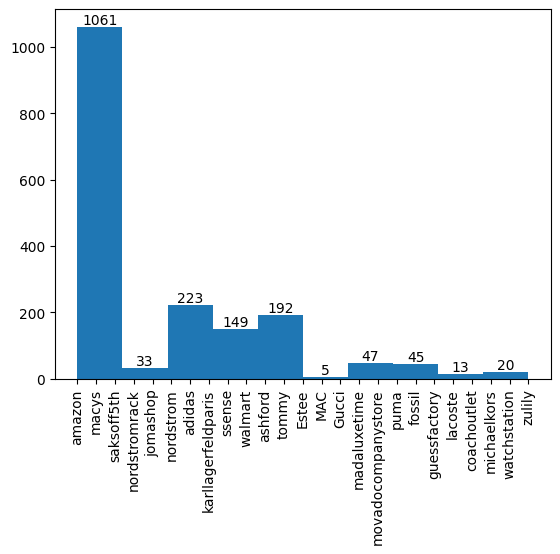

In [264]:
counts, edges, bars = plt.hist(sale_data['name_web'])
plt.xticks(rotation=90)
plt.bar_label(bars)
plt.show()

## subject
Tương tự với cột subject có một vài cột nhập không hợp lệ và có những điểm dữ liệu "NONE" và link của các sản phẩm này không còn hiệu lực. Chính vì vậy, nhóm quyết định chuyển về nan và tiến hành xử lí sau

<Axes: >

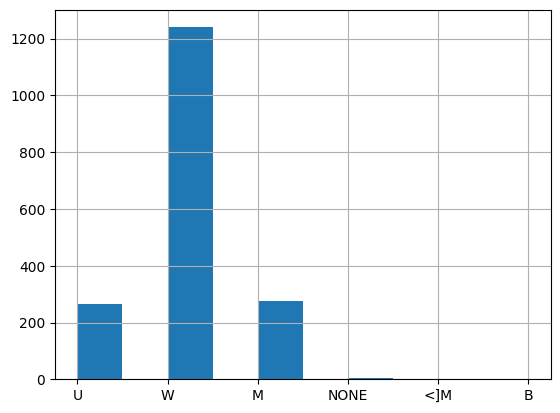

In [265]:
sale_data['subject'].hist()

In [266]:
sale_data['subject'].replace(to_replace=['<]M', 'B', 'NONE'],
                             value = np.nan,
                             inplace= True)

In [267]:
sale_data['subject'] = sale_data['subject'].str.lower()

## Color
Cột màu có khá nhiều giá trị không phù hợp, ngoài ra có những màu là nhánh phụ của màu khác. Chính vì vậy, sau khi chỉnh sửa các điểm dữ liệu về format đúng (tiếng anh viết thường), nhóm tiến hành xuất ra 2 cột màu mới:

### color: 
        + Với tên màu là màu nhánh chính thì giữ nguyên, vd: red
        + Với tên màu là màu nhánh phụ thì có định dạng là màu-chính_tên-màu, vd: scarlet_red


### color1: chuyển toàn bộ màu về nhánh chính của nó. Các màu nhánh chính bao gồm:

    'black', 'white', 'gray', 'red', 'blue', 'pink', 'green', 'brown', 'violet', 'yellow', 'orange',  'colorful' (colorful là sản phẩm có nhiều màu, không xác định được màu chính, hoặc các sản phẩm không có mã màu phù hợp)

In [268]:
# format
color_mapping = {
    'zero': '0',
    'one': '1',
    'two': '2',
    'three': '3',
    'four': '4',
    'five': '5',
    'six': '6',
    'seven': '7',
    'eight': '8',
    'nine': '9',
    'ten': '10',
    'đen': 'black',
    'watch': '',
    'gumental': 'gunmetal_gray',
    'golden': 'gold',
    'gold': 'gold_yellow',
    'sky captain': 'sky_captain_blue',
    'lemon lime': 'yellow',
    'blue sky' : 'sky_blue',
    'navy': 'navy_blue',
    'nude': 'nude_white',
    'vanilla': 'vanilla_white',
    'ivory': 'ivory_white',
    'purple': 'violet',
    'periwinkle': 'violet_blue',
    'beige': 'beige_yellow_brown',
    'camel': 'camel_brown',
    'cerise': 'cerise_pink',
    'cognac': 'cognac_red_brown',
    'ballet': 'ballet_pink',
    'scarlet': 'scarlet_red',
    'khaki': 'khaki_yellow',
    'havana': 'brown',
    'crimson': 'crimson_red',
    'silver': 'silver_gray',
    'nero': 'nero_black',
    'gunmetal': 'gunmetal_gray',
    'burgundy': 'burgundy_red',
    'cream': 'cream_yellow'
}

In [269]:
sale_data['color'] = sale_data['color'].str.lower()
sale_data['color'].replace(color_mapping,
                           regex = True,
                           inplace = True)


In [270]:
sale_data['color'].replace(to_replace = '[^a-z_]',
                           value = ' ',
                           regex = True,
                           inplace = True)

In [271]:
def format_color(color):
  if type(color) != str:
    return np.nan
  if len(color) < 3:
    return ''
  _color = color.split(' ')

  if len(_color) == 1:
    return color

  _color1 = [element for element in _color if '_' in element]

  if len(_color1) == 1:
    return _color1[0]

  return 'colorful'



In [272]:
sale_data['color'] = sale_data['color'].apply(lambda x: format_color(x))

In [273]:
sale_data['color'] = sale_data['color'].str.strip()

In [274]:
sale_data['color'].replace(to_replace = '',
                           value = np.nan,
                           inplace = True)

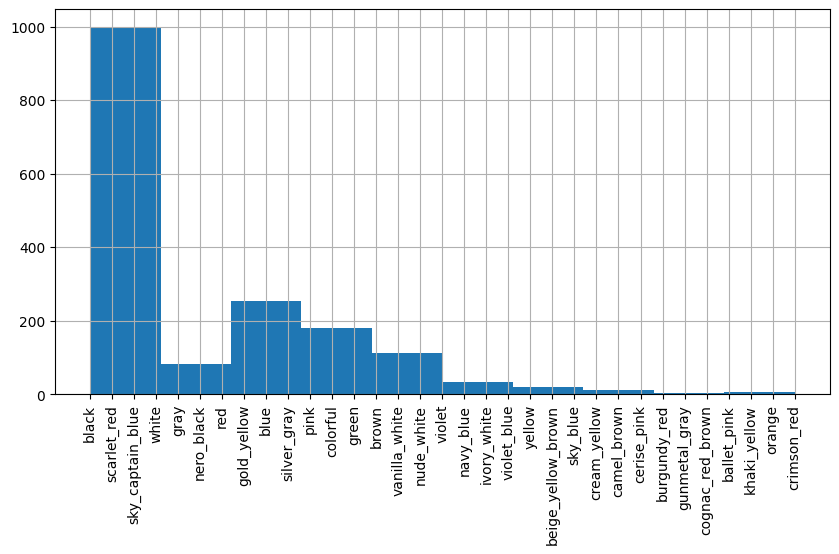

In [275]:
plt.figure(figsize=(10,5))
sale_data['color'].hist()
plt.xticks(rotation=90)
plt.show()

In [276]:
_color = sale_data[~sale_data['color'].str.contains('_', na = True)]['color'].unique()
_color

array(['black', 'white', 'gray', 'red', 'blue', 'pink', 'colorful',
       'green', 'brown', 'violet', 'yellow', 'orange'], dtype=object)

In [277]:
def color_general(color):
  if type(color) != str:
    return np.nan
  _color = color.split('_')
  return _color[-1]

In [278]:
sale_data['color1'] = sale_data['color'].apply(lambda x: color_general(x))

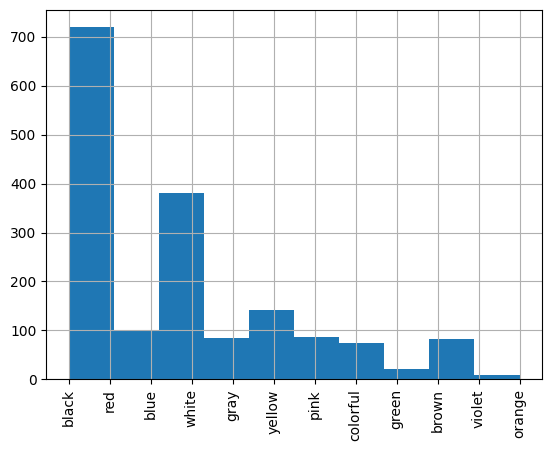

In [279]:
#plt.figure(figsize=(10,5))
sale_data.color1.hist()
plt.xticks(rotation=90)
plt.show()

## category

Tương tự cột color, cột category có khá nhiều lỗi nhập liệu không hợp, và có nhiều sản phẩm có thể quy về một nhóm. Sau khi tiến hành quan sát nhóm tiến hành chuyển cột category thành 3 cột với quy tắc tương tự cột corlor. Tuy nhiên, trong quát trình quan sát, nhóm nhận thấy category 1 còn nhiều sản phẩm có thể gom chung tiếp nữa, nên đã tiến hành gộp lần 2 và được kết quả như sau:

### Category:
    Bao gồm các category có dạng category1_category-gốc

### Category1:
    Chuyển các category về các nhóm phù hợp: 
        'bag', 'dress', 'shoes', 'watch', 'jewelry', 'glasses', 'cosmetic', 'accessory', 'technology', 
        'shirt', 'hat', 'underwear', 'thing', nan, 'leg', 'suit', 'jacket'
### Category2:
    Category1 có một vài sản phẩm chênh lệch số lượng quá nhiều và có thể gộp chung các category này tiếp tục, nên nhóm tiếp tục quy về các category sau:
        'bag', 'clothing', 'shoes', 'accessory', 'cosmetic', 'other', nan

In [280]:
sale_data['category'].unique()

array(['Bag', 'Dress', 'Sneakers', 'Sandals', 'Pumps', 'Boots', 'Watch',
       'Mules', 'Flats', 'Satchel', 'Bracelet', 'Wallet', 'Case',
       'Shirtdress', 'Glass', 'Lipstick', 'Toner', 'Foundation', 'Sock',
       'Backpack', 'Belt', 'Cardholder', 'Mask', 'Heel', 'Tone',
       'Earbuds', 'Necklace', 'Earring', 'Shirt', 'Jewelry', 'Hat',
       'Briefs', 'Trunks', 'Shoes', 'Cap', 'Bras', 'Headphones', nan,
       'Son', 'Loafers', 'Tie', 'Bracelets', 'Sunglasses', 'Poplin',
       'Earnings', 'Pump', 'Towel', 'Glasses', 'Treatment', 'Brush',
       'Massage', 'Leggings', 'Pants', 'Clogs', 'Skirt', 'Polo', 'Hoodie',
       'Sweatshirt', 'Jumpsuit', 'Swimsuit', 'Massase', 'watch',
       'Slippers', 'Heels', 'Slides', 'Shorts', 'Minidress', 'Jacket',
       'Tights', 'Windbreaker', 'Pouchette', 'Smartwatch', 'Jeans',
       'Bottle', 'Pack', 'Ring', 'Crewneck', 'Sandal', 'Dumps', 'Tee',
       'Visor', 'Wristtlet', 'Blazer', 'Crystal', 'Turquoise', 'Bra',
       'Holder', 'Scarf', '

In [281]:
# format
category_mapping = {
    'sneakers': 'sneaker_shoes',
    'sneaker': 'sneaker_shoes',
    'pumps': 'pump_shoes',
    'pump': 'pump_shoes',
    'sandals': 'sandal_shoes',
    'sandal': 'sandal_shoes',
    'mules': 'mule_shoes',
    'mule': 'mule_shoes',
    'flats': 'flat_shoes',
    'flat': 'flat_shoes',
    'satchels': 'satchel_shoes',
    'satchel': 'satchel_shoes',
    'socks': 'sock_shoes',
    'sock': 'sock_shoes',
    'heels': 'heel_shoes',
    'heel': 'heel_shoes',
    'poplin': 'poppins_shoes',
    'poplins': 'poppins_shoes',
    'loafers': 'loafer_shoes',
    'loafer': 'loafer_shoes',
    'clogs': 'clog_shoes',
    'clog': 'clog_shoes',
    'slippers':'slipper_shoes',
    'slipper':'slipper_shoes',
    'slides': 'slide_shoes',
    'slide': 'slide_shoes',
    'dumps': 'pump_shoes',
    'dump': 'pump_shoes',
    'boots': 'boot_shoes',
    'boot': 'boot_shoes',

    'lipstick': 'lipstick_cosmetic',
    'toner': 'toner_cosmetic',
    'foundation': 'foundation_cosmetic',
    'mask': 'Mask_cosmetic',
    'tone': 'toner_cosmetic',
    'son': 'lipstick_cosmetic',
    'treatment': 'treatment_cosmetic',

    'bracelets': 'bracelet_jewelry',
    'bracelet': 'bracelet_jewelry',
    'necklace': 'necklace_jewelry',
    'earrings': 'earring_jewelry',
    'earnings': 'earring_jewelry',
    'earring': 'earring_jewelry',
    'ring': 'ring_jewelry',
    'crewneck': 'crewneck_jewelry',
    'crystal': 'jewelry',
    'turquoise': 'jewelry',

    'trunks': 'trunks_thing',
    'towel': 'towel_thing',
    'brush': 'brush_thing',
    'bottle': 'bottle_thing',
    'glass': 'glasses',
    'sunglasses': 'sun_glasses',
    'tie': 'tie_accessory',
    'scarf': 'scarf_accessory',
    'smartwatch': 'watch',
    'belt': 'belt_accessory',
    'cap': 'cap_hat',
    'visor': 'visor_hat',

    'headphones': 'headphones_technology',
    'earbuds': 'earbuds_technology',
    'massage': 'massage_technology',
    'massase': 'massage_technology',
    'backbag': 'back_bag',
    'backpack': 'pack_bag',
    'case': 'case_bag',
    'pack': 'pack_bag',
    'wristtlet': 'wristlet_bag',
    'cardholder': 'cardholder_bag',
    'holder': 'cardholder_bag',
    'wallet': 'wallet_bag',
    'pouchette': 'pochette_bag',


    'leggings': 'leggings_leg',
    'legging': 'leggings_leg',
    'pants': 'pants_leg',
    'pant': 'pants_leg',
    'shorts':'shorts_leg',
    'tights':'tights_leg',
    'jeans': 'jeans_leg',

    'shirtdress': 'shirt_dress',
    'minidress': 'mini_dress',
    'skirt': 'skirt_dress',
    'polo': 'polo_shirt',
    'hoodie': 'hoodie_shirt',
    'sweatshirt': 'sweat_shirt',
    'tee': 'tee_shirt',
    'jumpsuit': 'jump_suit',
    'swimsuit': 'swim_suit',
    'windbreaker':'windbreaker_jacket',
    'blazer': 'blazer_jacket',
    'briefs': 'briefs_underwear',
    'bras': 'bra_underwear',
    'bra': 'bra_underwear',

    'medium': '',
    'line':'',
    'waistb': '',
    'waist': '',
    'h': '',
    'none': '',
    'driver': '',
    'analog':'',
    'plastic': ''
}

In [282]:
sale_data['category'] = sale_data['category'].str.lower()
sale_data['category'].replace(category_mapping,
                              inplace = True)

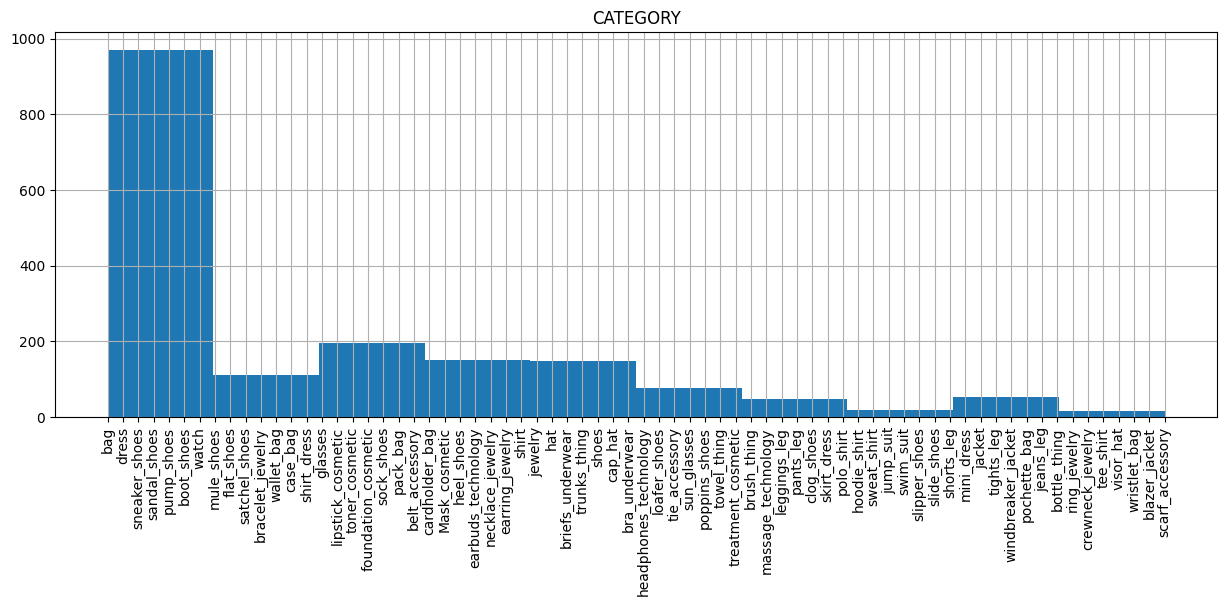

In [283]:
plt.figure(figsize=(15,5))
sale_data.category.hist()
plt.xticks(rotation=90)
plt.title("CATEGORY")
plt.show()

In [284]:
sale_data['category'].replace(to_replace = '',
                              value = np.nan,
                              inplace= True)

In [285]:
def category_general(category):
  if type(category) != str:
    return np.nan
  _category = category.split('_')
  return _category[-1]

In [286]:
sale_data['category1'] = sale_data['category'].apply(lambda x: category_general(x))

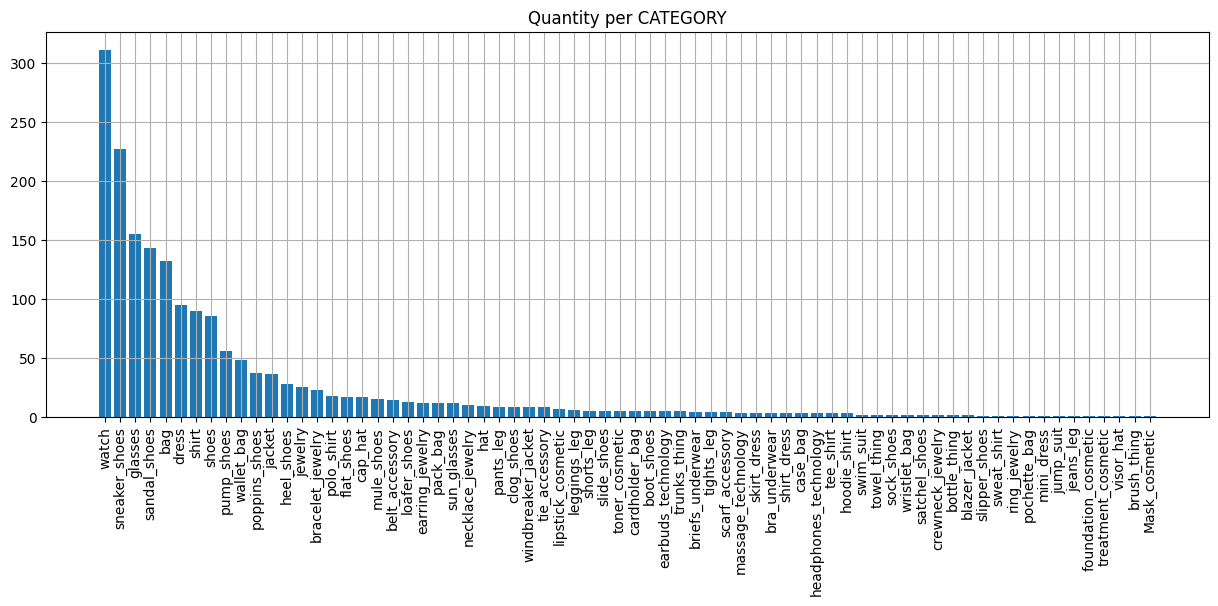

In [287]:
x = sale_data.groupby('category').count().sort_values(ascending = False, by = 'date')
plt.figure(figsize=(15,5))
plt.bar(x.index, x['date'])
plt.xticks(rotation=90)
plt.title("Quantity per CATEGORY")
plt.grid()
plt.show()

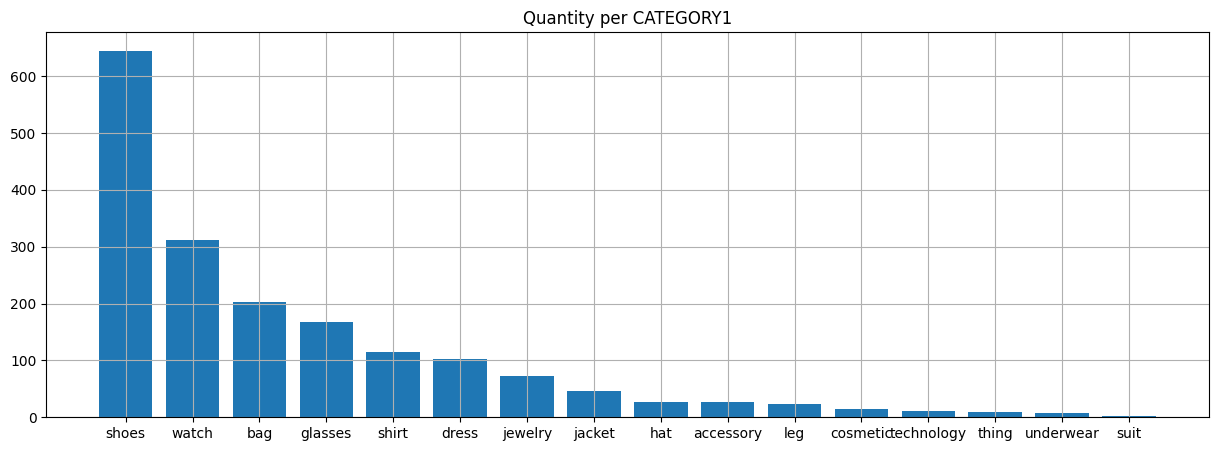

In [288]:
x = sale_data.groupby('category1').count().sort_values(ascending = False, by = 'date')
plt.figure(figsize=(15,5))
plt.bar(x.index, x['date'])
plt.title("Quantity per CATEGORY1")
plt.grid()
plt.show()

In [289]:
category_mapping1 = {
    'dress': 'clothing',
    'shirt': 'clothing',
    'underwear': 'clothing',
    'leg': 'clothing',
    'suit': 'clothing',
    'jacket': 'clothing',
    'watch': 'accessory',
    'jewelry': 'accessory',
    'glasses': 'accessory',
    'hat': 'accessory',
    'technology': 'other',
    'thing': 'other'
}

In [290]:
sale_data['category2'] = sale_data['category1']
sale_data['category2'].replace(category_mapping1, inplace = True)

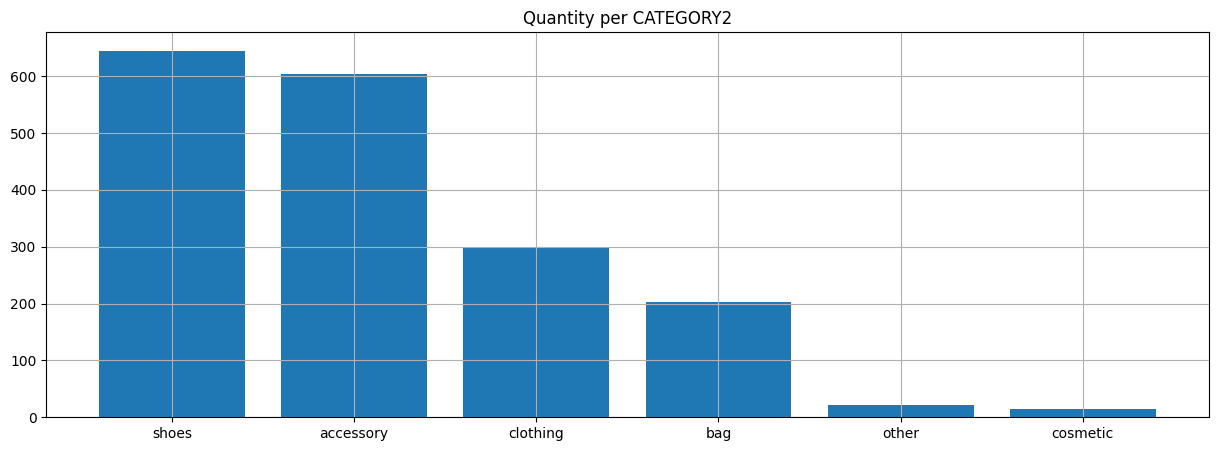

In [291]:
x = sale_data.groupby('category2').count().sort_values(ascending = False, by = 'date')
plt.figure(figsize=(15,5))
plt.bar(x.index, x['date'])
plt.title("Quantity per CATEGORY2")
plt.grid()
plt.show()

## price

Chuyển các purchase_price và sale_price về dạng float cho dễ xử lí

In [292]:
def money2float(money_value):
  if type(money_value) != str:
    return np.nan
  # Remove non-numeric characters
  numeric_string = re.sub(r'[^\d.]', '', money_value)

  if numeric_string == '':
    return np.nan
  # Convert to float
  numeric_value = float(numeric_string)

  return numeric_value

In [293]:
sale_data.purchase_price = sale_data.purchase_price.apply(lambda x: money2float(x))
sale_data.sale_price = sale_data.sale_price.apply(lambda x: money2float(x))

## amount

Dữ liệu có khá nhiều điểm số lượng sản phẩm (amount) không hợp lệ (0, nan). Sau khi quan sát, nhóm nhận ra có thể xử lí theo 2 trường hợp:

- Đối với các dữ liệu có purchase_price null hoặc bằng không, là những trường hợp đã được khách đặc trước tuy nhiên đã bị hủy hoặc sau khi săn sale và báo giá thì không đạt được thỏa thuận, hoặc hàng hết không mua kịp. Chính vì vậy nhóm quyết định drop các điểm dữ liệu này vì nó không phù hợp với dữ liệu báo cáo doanh thu.

- Các trường hợp số lượng bằng 0 hoặc rỗng sẽ tiến hành điền amout = 1. Do bên doanh nghiệp không chú trọng ghi chép lại dư liệu nên có khá nhiều sai sót và thiếu, tuy nhiên hầu hết lúc ghi chép số lượng bằng 1 thường được bỏ qua dẫn đến thiếu sót. Ngoài ra, các sản phẩm trong dữ liệu hoeenj tại, loại đi trường hợp không mua thì đều được mua ít nhất là 1 sản phẩm không có trường hợp mua được 0 sản phẩm

In [294]:
sale_data['amount'].unique()

array([ 1.,  2.,  6.,  5.,  0.,  3.,  4., 10.,  7., nan,  8., 11., 15.,
       20.])

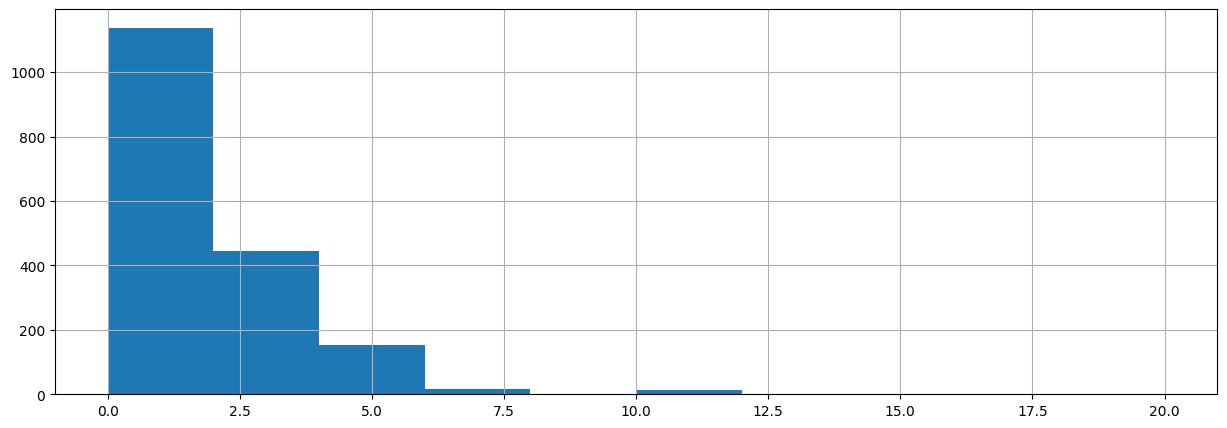

In [295]:
plt.figure(figsize=(15,5))
sale_data['amount'].hist()
#plt.xticks(rotation=90)
plt.show()

In [296]:
condition1 = (sale_data['amount'] == 0) | (sale_data['amount'].isnull())
condition2 = (sale_data['purchase_price'].isnull()) | (sale_data['purchase_price'] == 0.0)
condition3 = (sale_data['sale_price'].isnull()) | (sale_data['sale_price'] == 0.0)

In [297]:
## Amount null or 0
sale_data[condition1].head()

,date,name_web,link_product,subject,color,category,amount,purchase_price,sale_price,year,month,day,color1,category1,category2
11,2023-01-14,saksoff5th,https://www.saksoff5th.com/product/dkny-logo-s...,u,black,sneaker_shoes,0.0,0.0,0.0,2023,1,14,black,shoes,shoes
14,2023-01-25,macys,https://www.macys.com/shop/product/guess-women...,w,black,watch,0.0,0.0,0.0,2023,1,25,black,watch,accessory
34,2023-02-05,macys,https://www.macys.com/shop/product/michael-mic...,w,gold_yellow,flat_shoes,0.0,0.0,0.0,2023,2,5,yellow,shoes,shoes
50,2023-02-11,nordstromrack,https://www.nordstromrack.com/s/tommy-hilfiger...,w,white,sneaker_shoes,0.0,0.0,0.0,2023,2,11,white,shoes,shoes
51,2023-02-12,nordstromrack,https://www.nordstromrack.com/s/tommy-hilfiger...,w,white,sneaker_shoes,0.0,0.0,0.0,2023,2,12,white,shoes,shoes


In [298]:
## purchase_price null or 0
sale_data[condition2].head()

,date,name_web,link_product,subject,color,category,amount,purchase_price,sale_price,year,month,day,color1,category1,category2
11,2023-01-14,saksoff5th,https://www.saksoff5th.com/product/dkny-logo-s...,u,black,sneaker_shoes,0.0,0.0,0.0,2023,1,14,black,shoes,shoes
14,2023-01-25,macys,https://www.macys.com/shop/product/guess-women...,w,black,watch,0.0,0.0,0.0,2023,1,25,black,watch,accessory
34,2023-02-05,macys,https://www.macys.com/shop/product/michael-mic...,w,gold_yellow,flat_shoes,0.0,0.0,0.0,2023,2,5,yellow,shoes,shoes
50,2023-02-11,nordstromrack,https://www.nordstromrack.com/s/tommy-hilfiger...,w,white,sneaker_shoes,0.0,0.0,0.0,2023,2,11,white,shoes,shoes
51,2023-02-12,nordstromrack,https://www.nordstromrack.com/s/tommy-hilfiger...,w,white,sneaker_shoes,0.0,0.0,0.0,2023,2,12,white,shoes,shoes


In [299]:
## sale_price null or 0
sale_data[condition3].head()

,date,name_web,link_product,subject,color,category,amount,purchase_price,sale_price,year,month,day,color1,category1,category2
11,2023-01-14,saksoff5th,https://www.saksoff5th.com/product/dkny-logo-s...,u,black,sneaker_shoes,0.0,0.0,0.0,2023,1,14,black,shoes,shoes
14,2023-01-25,macys,https://www.macys.com/shop/product/guess-women...,w,black,watch,0.0,0.0,0.0,2023,1,25,black,watch,accessory
34,2023-02-05,macys,https://www.macys.com/shop/product/michael-mic...,w,gold_yellow,flat_shoes,0.0,0.0,0.0,2023,2,5,yellow,shoes,shoes
50,2023-02-11,nordstromrack,https://www.nordstromrack.com/s/tommy-hilfiger...,w,white,sneaker_shoes,0.0,0.0,0.0,2023,2,11,white,shoes,shoes
51,2023-02-12,nordstromrack,https://www.nordstromrack.com/s/tommy-hilfiger...,w,white,sneaker_shoes,0.0,0.0,0.0,2023,2,12,white,shoes,shoes


In [300]:
## Trường hợp khách hàng đặt trước nhưng không mua được
sale_data = sale_data.drop(sale_data[condition2].index).reset_index(drop=True)

In [301]:
## Các trường hợp hiện tại đều được ghi nhận là bán được, ít nhất là 1 sản phẩm không có trường hợp không có sản phâm nào
sale_data['amount'] = sale_data['amount'].fillna(1.0)
sale_data['amount'].replace(to_replace=[0.0],
                            value = 1.0,
                            inplace = True)

In [302]:
sale_data[(sale_data['amount'] == 0) | (sale_data['amount'].isnull())].head()

,date,name_web,link_product,subject,color,category,amount,purchase_price,sale_price,year,month,day,color1,category1,category2


In [303]:
sale_data[(sale_data['purchase_price'].isnull()) | (sale_data['purchase_price'] == 0.0)]

,date,name_web,link_product,subject,color,category,amount,purchase_price,sale_price,year,month,day,color1,category1,category2


In [309]:
sale_data[sale_data['sale_price'].isnull() | sale_data['sale_price'] == 0.0].head()

,date,name_web,link_product,subject,color,category,amount,purchase_price,sale_price,year,month,day,color1,category1,category2
414,2023-05-18,macys,https://www.macys.com/shop/product/michael-mic...,w,brown,pump_shoes,1.0,1485000.0,0.0,2023,5,18,brown,shoes,shoes


## General
Ở phân này nhóm tiến hành:
- Đổi tên cột cho phù hợp
- Sửa giá tiên cho phù hợp thực tế
- Điền các giá trị null cột sale_price_unit:

        Sau khi hỏi lại với bên doanh nghiệp, nhóm nhận được thông tin các dữ liệu có giá bán null là các sản phẩm không bán được. Nên nhóm tiến hành điền các giá trị null này bằng 0
- Bổ sung các cột:
    + sale_price    : Tổng giá bán được 
    + purchase_price: Tổng giá mua
    + revenue       : Tổng doanh thu
    + %revenue_unit : Phần trăm lãi của một sản phẩm

In [307]:
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1640 non-null   datetime64[ns]
 1   name_web        1640 non-null   object        
 2   link_product    1638 non-null   object        
 3   subject         1633 non-null   object        
 4   color           1555 non-null   object        
 5   category        1637 non-null   object        
 6   amount          1640 non-null   float64       
 7   purchase_price  1640 non-null   float64       
 8   sale_price      1603 non-null   float64       
 9   year            1640 non-null   int32         
 10  month           1640 non-null   int32         
 11  day             1640 non-null   int32         
 12  color1          1555 non-null   object        
 13  category1       1637 non-null   object        
 14  category2       1637 non-null   object        
dtypes: d

In [311]:
sale_data = sale_data[['date', 'year', 'month', 'day', 'name_web', 'link_product', 'subject', 'color', 'color1', 'category', 'category1', 'category2', 'amount', 'purchase_price', 'sale_price']]

In [312]:
sale_data.columns = ['date', 'year', 'month', 'day', 'name_web', 'link_product', 'subject', 'color', 'color1', 'category', 'category1', 'category2', 'amount', 'purchase_price_unit', 'sale_price_unit']

In [313]:
sale_data.loc[(sale_data['sale_price_unit'] < sale_data['purchase_price_unit']) & 
              (sale_data['sale_price_unit'] != 0.0) & 
              (sale_data['sale_price_unit'] <10000.0),
              'sale_price_unit'] *= 1000.0

In [314]:
sale_data.loc[(sale_data['sale_price_unit'] < sale_data['purchase_price_unit']) & 
              (sale_data['sale_price_unit'] != 0.0) & 
              (sale_data['sale_price_unit'] <1000000.0),
              'sale_price_unit'] *= 10.0

In [315]:
sale_data['sale_price_unit'].fillna(0, inplace= True)

In [317]:
sale_data['sale_price'] = sale_data['sale_price_unit']*sale_data['amount']
sale_data['purchase_price'] = sale_data['purchase_price_unit']*sale_data['amount']

In [318]:
sale_data['revenue'] = sale_data['sale_price'] - sale_data['purchase_price']

In [319]:
sale_data['%revenue_unit'] = (sale_data['sale_price_unit'] - sale_data['purchase_price_unit'])/sale_data['sale_price_unit']*100

In [320]:
sale_data.head()

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit
0,2023-01-14,2023,1,14,amazon,https://www.amazon.com/Karl-Lagerfeld-Paris-Ma...,u,black,black,bag,bag,bag,1.0,1560900.0,1890000.0,1890000.0,1560900.0,329100.0,17.412698
1,2023-01-14,2023,1,14,macys,https://www.macys.com/shop/product/tommy-hilfi...,w,scarlet_red,red,dress,dress,clothing,2.0,744120.0,890000.0,1780000.0,1488240.0,291760.0,16.391011
2,2023-01-14,2023,1,14,macys,https://www.macys.com/shop/product/tommy-hilfi...,w,scarlet_red,red,dress,dress,clothing,2.0,744120.0,890000.0,1780000.0,1488240.0,291760.0,16.391011
3,2023-01-14,2023,1,14,macys,https://www.macys.com/shop/product/tommy-hilfi...,w,sky_captain_blue,blue,dress,dress,clothing,6.0,744120.0,890000.0,5340000.0,4464720.0,875280.0,16.391011
4,2023-01-14,2023,1,14,macys,https://www.macys.com/shop/product/tommy-hilfi...,w,sky_captain_blue,blue,dress,dress,clothing,2.0,744120.0,890000.0,1780000.0,1488240.0,291760.0,16.391011


In [321]:
sale_data.columns

Index(['date', 'year', 'month', 'day', 'name_web', 'link_product', 'subject',
       'color', 'color1', 'category', 'category1', 'category2', 'amount',
       'purchase_price_unit', 'sale_price_unit', 'sale_price',
       'purchase_price', 'revenue', '%revenue_unit'],
      dtype='object')

In [322]:
sale_data.loc[sale_data['%revenue_unit'] < -99.99 , '%revenue_unit'] = -100.0

In [323]:
sale_data.to_csv('Final_SALESDATA.csv',
                 index = False)

# FILL_MISSING

In [2]:
data_path = 'Final_SALESDATA.csv'

In [3]:
sale_data = pd.read_csv(data_path)
sale_data.head()

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit
0,2023-01-14,2023,1,14,amazon,https://www.amazon.com/Karl-Lagerfeld-Paris-Ma...,u,black,black,bag,bag,bag,1.0,1560900.0,1890000.0,1890000.0,1560900.0,329100.0,17.412698
1,2023-01-14,2023,1,14,macys,https://www.macys.com/shop/product/tommy-hilfi...,w,scarlet_red,red,dress,dress,clothing,2.0,744120.0,890000.0,1780000.0,1488240.0,291760.0,16.391011
2,2023-01-14,2023,1,14,macys,https://www.macys.com/shop/product/tommy-hilfi...,w,scarlet_red,red,dress,dress,clothing,2.0,744120.0,890000.0,1780000.0,1488240.0,291760.0,16.391011
3,2023-01-14,2023,1,14,macys,https://www.macys.com/shop/product/tommy-hilfi...,w,sky_captain_blue,blue,dress,dress,clothing,6.0,744120.0,890000.0,5340000.0,4464720.0,875280.0,16.391011
4,2023-01-14,2023,1,14,macys,https://www.macys.com/shop/product/tommy-hilfi...,w,sky_captain_blue,blue,dress,dress,clothing,2.0,744120.0,890000.0,1780000.0,1488240.0,291760.0,16.391011


<Axes: >

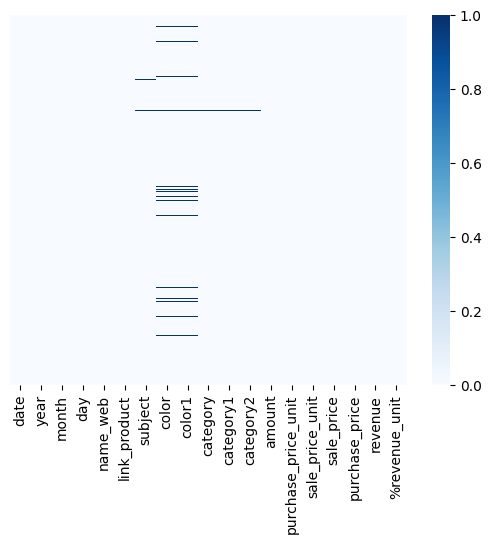

In [4]:
sns.heatmap(sale_data.isnull(), yticklabels = False, cbar = True, cmap="Blues")

## subject & category

In [5]:
sale_data[sale_data['subject'].isnull()]

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit
271,2023-04-20,2023,4,20,tommy,NaN,NaN,NaN,NaN,sneaker_shoes,shoes,shoes,1.0,725700.0,990000.0,990000.0,725700.0,264300.0,26.696970
284,2023-04-22,2023,4,22,ashford,https://www.ashford.com/burberry-be2344f-3952-...,NaN,black,black,glasses,glasses,accessory,2.0,3250000.0,3690000.0,7380000.0,6500000.0,880000.0,11.924119
420,2023-05-20,2023,5,20,Estee,Estee,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1764000.0,2190000.0,2190000.0,1764000.0,426000.0,19.452055
421,2023-05-20,2023,5,20,Estee,Estee,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2205000.0,2490000.0,2490000.0,2205000.0,285000.0,11.445783
422,2023-05-20,2023,5,20,Estee,Estee,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2604000.0,2790000.0,2790000.0,2604000.0,186000.0,6.666667
1098,2023-08-07,2023,8,7,lacoste,https://www.lacoste.com/us/kids%E2%80%99-brand...,NaN,NaN,NaN,shirt,shirt,clothing,2.0,451012.0,690000.0,1380000.0,902024.0,477976.0,34.635942
1099,2023-08-07,2023,8,7,lacoste,https://www.lacoste.com/us/kids%E2%80%99-brand...,NaN,NaN,NaN,shirt,shirt,clothing,5.0,451012.0,690000.0,3450000.0,2255060.0,1194940.0,34.635942


In [6]:
sale_data[sale_data['link_product'] == 'Estee']

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit
420,2023-05-20,2023,5,20,Estee,Estee,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1764000.0,2190000.0,2190000.0,1764000.0,426000.0,19.452055
421,2023-05-20,2023,5,20,Estee,Estee,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2205000.0,2490000.0,2490000.0,2205000.0,285000.0,11.445783
422,2023-05-20,2023,5,20,Estee,Estee,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2604000.0,2790000.0,2790000.0,2604000.0,186000.0,6.666667


In [7]:
#Estee is a cosmetic company, so the subject is women (although there are also some men, but they represent a small portion)
sale_data.loc[sale_data['link_product'] == 'Estee', ['subject',	'category',	'category1']] = ['w', 'cosmetic', 'cosmetic']

In [8]:
sale_data[sale_data['subject'].isnull()]

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit
271,2023-04-20,2023,4,20,tommy,NaN,NaN,NaN,NaN,sneaker_shoes,shoes,shoes,1.0,725700.0,990000.0,990000.0,725700.0,264300.0,26.696970
284,2023-04-22,2023,4,22,ashford,https://www.ashford.com/burberry-be2344f-3952-...,NaN,black,black,glasses,glasses,accessory,2.0,3250000.0,3690000.0,7380000.0,6500000.0,880000.0,11.924119
1098,2023-08-07,2023,8,7,lacoste,https://www.lacoste.com/us/kids%E2%80%99-brand...,NaN,NaN,NaN,shirt,shirt,clothing,2.0,451012.0,690000.0,1380000.0,902024.0,477976.0,34.635942
1099,2023-08-07,2023,8,7,lacoste,https://www.lacoste.com/us/kids%E2%80%99-brand...,NaN,NaN,NaN,shirt,shirt,clothing,5.0,451012.0,690000.0,3450000.0,2255060.0,1194940.0,34.635942


In [9]:
# sneaker, glasses, shirt can be unisex, so subject = u
sale_data.loc[sale_data['subject'].isnull(), 'subject'] = 'u'

In [10]:
sale_data[sale_data['subject'].isnull()]

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit


In [11]:
sale_data[sale_data['category'].isnull()]

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit


In [12]:
sale_data[sale_data['category1'].isnull()]

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit


In [13]:
sale_data[sale_data['category2'].isnull()]

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit
420,2023-05-20,2023,5,20,Estee,Estee,w,NaN,NaN,cosmetic,cosmetic,NaN,1.0,1764000.0,2190000.0,2190000.0,1764000.0,426000.0,19.452055
421,2023-05-20,2023,5,20,Estee,Estee,w,NaN,NaN,cosmetic,cosmetic,NaN,1.0,2205000.0,2490000.0,2490000.0,2205000.0,285000.0,11.445783
422,2023-05-20,2023,5,20,Estee,Estee,w,NaN,NaN,cosmetic,cosmetic,NaN,1.0,2604000.0,2790000.0,2790000.0,2604000.0,186000.0,6.666667


In [14]:
sale_data['category2'].fillna(sale_data['category1'], inplace = True)

In [15]:
sale_data[sale_data['category2'].isnull()]

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit


## Link_product

In [16]:
sale_data[sale_data['link_product'].isnull()]

,date,year,month,day,name_web,link_product,subject,color,color1,category,category1,category2,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit
271,2023-04-20,2023,4,20,tommy,NaN,u,NaN,NaN,sneaker_shoes,shoes,shoes,1.0,725700.0,990000.0,990000.0,725700.0,264300.0,26.696970
735,2023-06-30,2023,6,30,macys,NaN,w,black,black,sandal_shoes,shoes,shoes,1.0,660250.0,890000.0,890000.0,660250.0,229750.0,25.814607


In [17]:

sale_data['link_product'].fillna(sale_data['name_web'], inplace = True)

## Color

<Axes: >

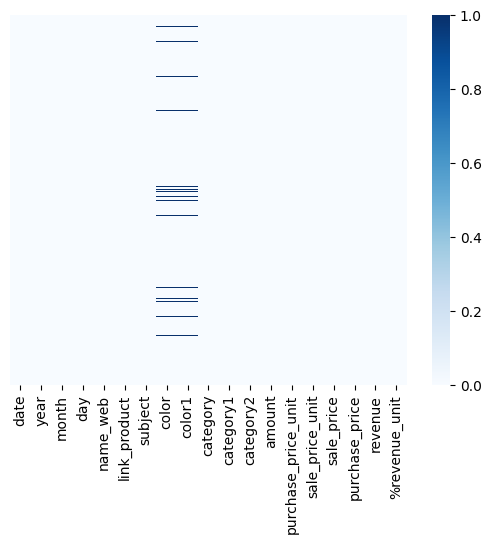

In [18]:
sns.heatmap(sale_data.isnull(), yticklabels = False, cbar = True, cmap="Blues")

### KNN

#### Prepare data

In [19]:
from Explore_data import get_num_columns, get_obj_columns

In [20]:
num_df = get_num_columns(sale_data).astype(float)
num_df.columns

Index(['year', 'month', 'day', 'amount', 'purchase_price_unit',
       'sale_price_unit', 'sale_price', 'purchase_price', 'revenue',
       '%revenue_unit'],
      dtype='object')

In [21]:
obj_df = get_obj_columns(sale_data)
obj_df.columns

Index(['date', 'name_web', 'link_product', 'subject', 'color', 'color1',
       'category', 'category1', 'category2'],
      dtype='object')

In [22]:
obj_df = pd.get_dummies(obj_df)

In [23]:
X_all = pd.concat([num_df, obj_df], axis = 1)
X_all.head(1)

,year,month,day,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit,date_2023-01-14,date_2023-01-15,date_2023-01-25,date_2023-01-26,date_2023-01-27,date_2023-01-28,date_2023-01-31,date_2023-02-02,date_2023-02-05,date_2023-02-06,date_2023-02-10,date_2023-02-11,date_2023-02-12,date_2023-02-14,date_2023-02-16,date_2023-02-17,date_2023-02-18,date_2023-02-19,date_2023-02-22,date_2023-03-03,date_2023-03-06,date_2023-03-07,date_2023-03-08,date_2023-03-09,date_2023-03-10,date_2023-03-11,date_2023-03-12,date_2023-03-13,date_2023-03-18,date_2023-03-19,date_2023-03-20,date_2023-03-21,date_2023-03-22,date_2023-03-23,date_2023-03-24,date_2023-03-26,date_2023-03-27,date_2023-03-28,date_2023-03-29,date_2023-03-30,date_2023-03-31,date_2023-04-01,date_2023-04-02,date_2023-04-03,date_2023-04-04,date_2023-04-05,date_2023-04-06,date_2023-04-07,date_2023-04-09,date_2023-04-10,date_2023-04-11,date_2023-04-12,date_2023-04-13,date_2023-04-17,date_2023-04-18,date_2023-04-19,date_2023-04-20,date_2023-04-22,date_2023-04-24,date_2023-04-25,date_2023-04-27,date_2023-04-29,date_2023-05-02,date_2023-05-04,date_2023-05-05,date_2023-05-07,date_2023-05-08,date_2023-05-09,date_2023-05-10,date_2023-05-11,date_2023-05-12,date_2023-05-18,date_2023-05-19,date_2023-05-20,date_2023-05-21,date_2023-05-22,date_2023-05-28,date_2023-05-29,date_2023-05-30,date_2023-06-04,date_2023-06-05,date_2023-06-06,date_2023-06-08,date_2023-06-09,date_2023-06-12,date_2023-06-13,date_2023-06-19,date_2023-06-20,date_2023-06-22,date_2023-06-23,date_2023-06-24,date_2023-06-25,date_2023-06-26,date_2023-06-27,date_2023-06-29,date_2023-06-30,date_2023-07-01,date_2023-07-03,date_2023-07-06,date_2023-07-07,date_2023-07-11,date_2023-07-12,date_2023-07-13,date_2023-07-14,date_2023-07-15,date_2023-07-17,date_2023-07-20,date_2023-07-25,date_2023-07-28,date_2023-07-31,date_2023-08-01,date_2023-08-02,date_2023-08-04,date_2023-08-05,date_2023-08-07,date_2023-08-09,date_2023-08-10,date_2023-08-11,date_2023-08-14,date_2023-08-15,date_2023-08-17,date_2023-08-19,date_2023-08-20,date_2023-08-21,date_2023-08-22,date_2023-08-23,date_2023-08-24,date_2023-08-25,date_2023-08-27,date_2023-08-29,date_2023-08-30,date_2023-08-31,date_2023-09-01,date_2023-09-04,date_2023-09-05,date_2023-09-06,date_2023-09-07,date_2023-09-08,date_2023-09-09,date_2023-09-10,date_2023-09-11,date_2023-09-12,date_2023-09-13,date_2023-09-14,date_2023-09-15,date_2023-09-16,date_2023-09-17,date_2023-09-18,date_2023-09-19,date_2023-09-22,name_web_Estee,name_web_Gucci,name_web_MAC,name_web_adidas,name_web_amazon,name_web_ashford,name_web_coachoutlet,name_web_fossil,name_web_guessfactory,name_web_jomashop,name_web_karllagerfeldparis,name_web_lacoste,name_web_macys,name_web_madaluxetime,name_web_michaelkors,name_web_movadocompanystore,name_web_nordstrom,name_web_nordstromrack,name_web_puma,name_web_saksoff5th,name_web_ssense,name_web_tommy,name_web_walmart,name_web_watchstation,name_web_zulily,link_product_Anne Klein's AK/3214LPRG Rose Gold-Tone and Light Pink Resin Bracelet,link_product_Estee,link_product_Giày tommy,link_product_Son MAC,link_product_https://madaluxetime.com/products/salvatore-ferragamo-f-80-silicone-watch-sfhy02522?fbclid=IwAR1xY7ZuolDpxxw-gFcnvmoZ7koGpxF_de_q8iXPhPMm2LKTIrbi_SaW3G8,link_product_https://madaluxetime.com/products/versace-greca-bracelet-watch-ve2k00521-ve2k00521,link_product_https://madaluxetime.com/products/versus-versace-fire-island-lion-strap-watch-vspoq7020-vspoq7020,link_product_https://madaluxetime.com/products/versus-versace-la-villette-bracelet-watch-vsp1s2521-vsp1s2521,link_product_https://madaluxetime.com/products/versus-versace-lea-bracelet-watch-vspen4021-vspen4021,link_product_https://madaluxetime.com/products/versus-versace-moscova-bracelet-watch-vsphh3021,link_product_https://madaluxetime.com/products/versus-versace-paradise-cove-bracelet-watch-vspzl0521-vspzl0521,link_product_https://madaluxetime.com/products/versus-versace-silver-lake-crystal-watch-vsp1h01

In [24]:
# scale
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

In [25]:
X = X_all.copy()
X.columns = X.columns.astype(str)
X = scaler.fit_transform(X)
X

array([[0.        , 0.        , 0.43333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.43333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.43333333, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.7       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.7       , ..., 0.        , 0.        ,
        1.        ]])

#### Choose the number of clusters

In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [27]:
_X = pd.DataFrame(X)
_X.dropna(inplace= True)

In [28]:
pca = PCA(n_components=2)
pca.fit(_X)
x_3d = pca.transform(_X)

C:\Users\ndp17\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ndp17\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


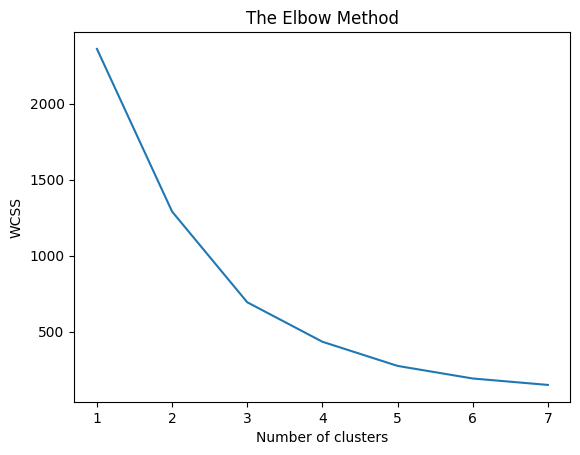

In [29]:
# Compute the WCSS for different values of K
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_3d)
    wcss.append(kmeans.inertia_)

# Plot the curve of WCSS against the number of clusters K
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(x_3d)

C:\Users\ndp17\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)

In [32]:
df_filled = imputer.fit_transform(X_all)

In [33]:
df_filled = pd.DataFrame(df_filled)
df_filled.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [34]:
df_filled.columns = X_all.columns

In [35]:
df_filled.head()

,year,month,day,amount,purchase_price_unit,sale_price_unit,sale_price,purchase_price,revenue,%revenue_unit,date_2023-01-14,date_2023-01-15,date_2023-01-25,date_2023-01-26,date_2023-01-27,date_2023-01-28,date_2023-01-31,date_2023-02-02,date_2023-02-05,date_2023-02-06,date_2023-02-10,date_2023-02-11,date_2023-02-12,date_2023-02-14,date_2023-02-16,date_2023-02-17,date_2023-02-18,date_2023-02-19,date_2023-02-22,date_2023-03-03,date_2023-03-06,date_2023-03-07,date_2023-03-08,date_2023-03-09,date_2023-03-10,date_2023-03-11,date_2023-03-12,date_2023-03-13,date_2023-03-18,date_2023-03-19,date_2023-03-20,date_2023-03-21,date_2023-03-22,date_2023-03-23,date_2023-03-24,date_2023-03-26,date_2023-03-27,date_2023-03-28,date_2023-03-29,date_2023-03-30,date_2023-03-31,date_2023-04-01,date_2023-04-02,date_2023-04-03,date_2023-04-04,date_2023-04-05,date_2023-04-06,date_2023-04-07,date_2023-04-09,date_2023-04-10,date_2023-04-11,date_2023-04-12,date_2023-04-13,date_2023-04-17,date_2023-04-18,date_2023-04-19,date_2023-04-20,date_2023-04-22,date_2023-04-24,date_2023-04-25,date_2023-04-27,date_2023-04-29,date_2023-05-02,date_2023-05-04,date_2023-05-05,date_2023-05-07,date_2023-05-08,date_2023-05-09,date_2023-05-10,date_2023-05-11,date_2023-05-12,date_2023-05-18,date_2023-05-19,date_2023-05-20,date_2023-05-21,date_2023-05-22,date_2023-05-28,date_2023-05-29,date_2023-05-30,date_2023-06-04,date_2023-06-05,date_2023-06-06,date_2023-06-08,date_2023-06-09,date_2023-06-12,date_2023-06-13,date_2023-06-19,date_2023-06-20,date_2023-06-22,date_2023-06-23,date_2023-06-24,date_2023-06-25,date_2023-06-26,date_2023-06-27,date_2023-06-29,date_2023-06-30,date_2023-07-01,date_2023-07-03,date_2023-07-06,date_2023-07-07,date_2023-07-11,date_2023-07-12,date_2023-07-13,date_2023-07-14,date_2023-07-15,date_2023-07-17,date_2023-07-20,date_2023-07-25,date_2023-07-28,date_2023-07-31,date_2023-08-01,date_2023-08-02,date_2023-08-04,date_2023-08-05,date_2023-08-07,date_2023-08-09,date_2023-08-10,date_2023-08-11,date_2023-08-14,date_2023-08-15,date_2023-08-17,date_2023-08-19,date_2023-08-20,date_2023-08-21,date_2023-08-22,date_2023-08-23,date_2023-08-24,date_2023-08-25,date_2023-08-27,date_2023-08-29,date_2023-08-30,date_2023-08-31,date_2023-09-01,date_2023-09-04,date_2023-09-05,date_2023-09-06,date_2023-09-07,date_2023-09-08,date_2023-09-09,date_2023-09-10,date_2023-09-11,date_2023-09-12,date_2023-09-13,date_2023-09-14,date_2023-09-15,date_2023-09-16,date_2023-09-17,date_2023-09-18,date_2023-09-19,date_2023-09-22,name_web_Estee,name_web_Gucci,name_web_MAC,name_web_adidas,name_web_amazon,name_web_ashford,name_web_coachoutlet,name_web_fossil,name_web_guessfactory,name_web_jomashop,name_web_karllagerfeldparis,name_web_lacoste,name_web_macys,name_web_madaluxetime,name_web_michaelkors,name_web_movadocompanystore,name_web_nordstrom,name_web_nordstromrack,name_web_puma,name_web_saksoff5th,name_web_ssense,name_web_tommy,name_web_walmart,name_web_watchstation,name_web_zulily,link_product_Anne Klein's AK/3214LPRG Rose Gold-Tone and Light Pink Resin Bracelet,link_product_Estee,link_product_Giày tommy,link_product_Son MAC,link_product_https://madaluxetime.com/products/salvatore-ferragamo-f-80-silicone-watch-sfhy02522?fbclid=IwAR1xY7ZuolDpxxw-gFcnvmoZ7koGpxF_de_q8iXPhPMm2LKTIrbi_SaW3G8,link_product_https://madaluxetime.com/products/versace-greca-bracelet-watch-ve2k00521-ve2k00521,link_product_https://madaluxetime.com/products/versus-versace-fire-island-lion-strap-watch-vspoq7020-vspoq7020,link_product_https://madaluxetime.com/products/versus-versace-la-villette-bracelet-watch-vsp1s2521-vsp1s2521,link_product_https://madaluxetime.com/products/versus-versace-lea-bracelet-watch-vspen4021-vspen4021,link_product_https://madaluxetime.com/products/versus-versace-moscova-bracelet-watch-vsphh3021,link_product_https://madaluxetime.com/products/versus-versace-paradise-cove-bracelet-watch-vspzl0521-vspzl0521,link_product_https://madaluxetime.com/products/versus-versace-silver-lake-crystal-watch-vsp1h01

In [36]:
_end    =   len(sale_data['category'].unique()) + len(sale_data['category1'].unique()) + len(sale_data['category2'].unique())
_start1 =   len(sale_data['category'].unique()) + len(sale_data['category1'].unique()) + len(sale_data['category2'].unique())\
            + len(sale_data['color1'].unique())
_start  =   len(sale_data['category'].unique()) + len(sale_data['category1'].unique()) + len(sale_data['category2'].unique())\
            + len(sale_data['color1'].unique()) + len(sale_data['color'].unique())

In [37]:
_color = df_filled.iloc[:, -1* _start +2: -1* _start1 +1].idxmax(1).str[len('color')+1:].to_frame()
_color.head()

,0
0,black
1,scarlet_red
2,scarlet_red
3,sky_captain_blue
4,sky_captain_blue


In [38]:
_color1 = df_filled.iloc[:, -1* _start1 +1: -1* _end].idxmax(1).str[len('color1')+1:].to_frame()
_color1.head()

,0
0,black
1,red
2,red
3,blue
4,blue


In [39]:
sale_data['color'] = _color
sale_data['color1'] = _color

<Axes: >

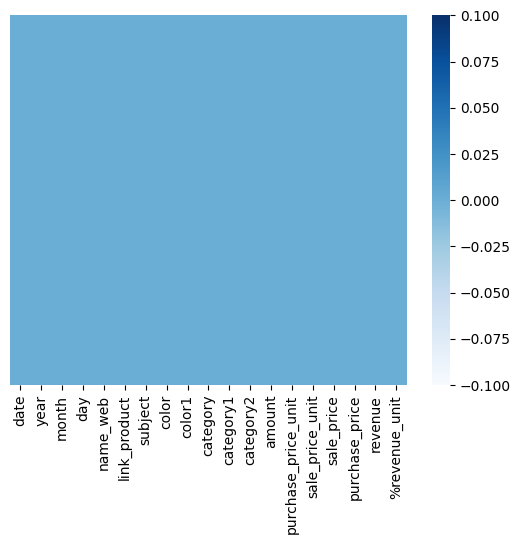

In [40]:
sns.heatmap(sale_data.isnull(), yticklabels = False, cbar = True, cmap="Blues")

## result

In [41]:
sale_data.to_csv('Final_SALESDATA1.csv',
                 index = False)